In [1]:
# Imports
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy import stats
import os
import statistics as pystats
from astropy.utils.data import get_pkg_data_filename
from reproject import reproject_interp

In [3]:
# open fits files
dir = '/Users/Brandon Lam/galaxies/' # directory containing folders containing galaxy fit files
galaxy = 'ngc1566' # name of folder(s) to look in
w1 = fits.getdata(dir + galaxy + '/hlsp_phangs-jwst_jwst_nircam_' + galaxy +'_f200w_v1p1_img.fits')
# w1 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac1_gauss3.fits')
# w1 = fits.getdata(dir + galaxy + '/' + galaxy +'_w1_mjysr.fits')
w1 = w1.flatten()

w2 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac2_gauss3.fits')
# w2 = fits.getdata(dir + galaxy + '/' + galaxy +'_w2_mjysr.fits')
w2 = w2.flatten()

w3 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac3_gauss4.fits')
# w3 = fits.getdata(dir + galaxy + '/' + galaxy +'_w3_mjysr.fits')
w3 = w3.flatten()

w4 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac4_gauss4.fits')
# w4 = fits.getdata(dir + galaxy + '/' + galaxy +'_w4_mjysr.fits')
w4 = w4.flatten()



Mean of w1: 1.0040326

Median of w1: 0.29669690132141113

Mode of w1: 0.0

Mean of w2: nan

Median of w2: 0.007253299001604319

Mode of w2: 0.019815551

Mean of w3: nan

Median of w3: 0.015163342468440533

Mode of w3: 0.044745043

Mean of w4: nan

Median of w4: -0.16726049780845642

Mode of w4: -0.04439743


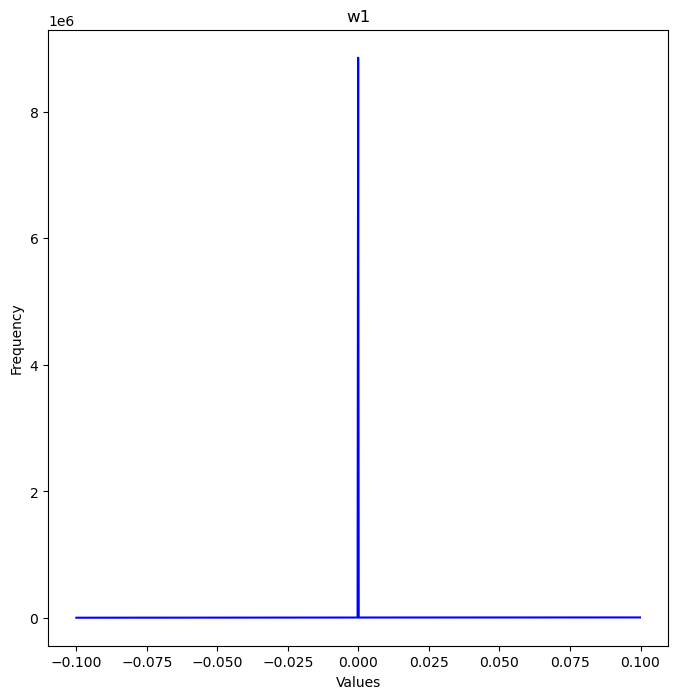

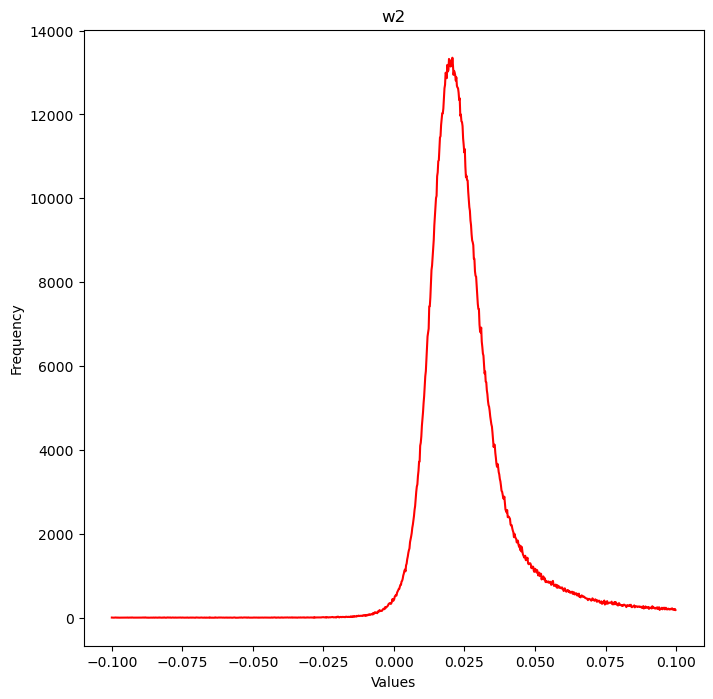

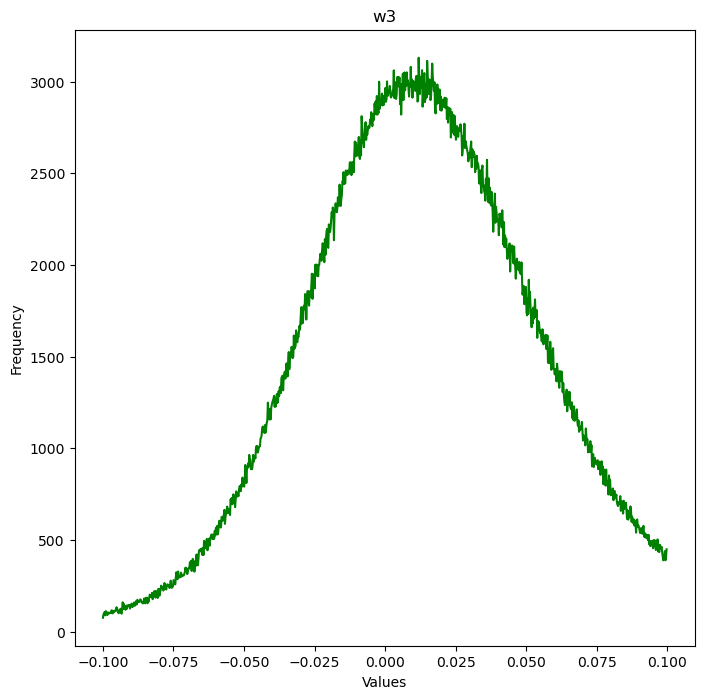

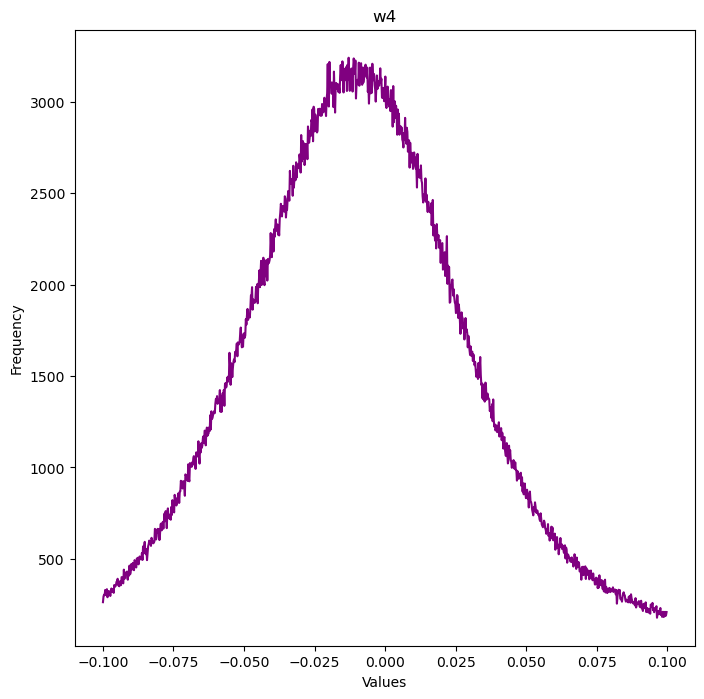

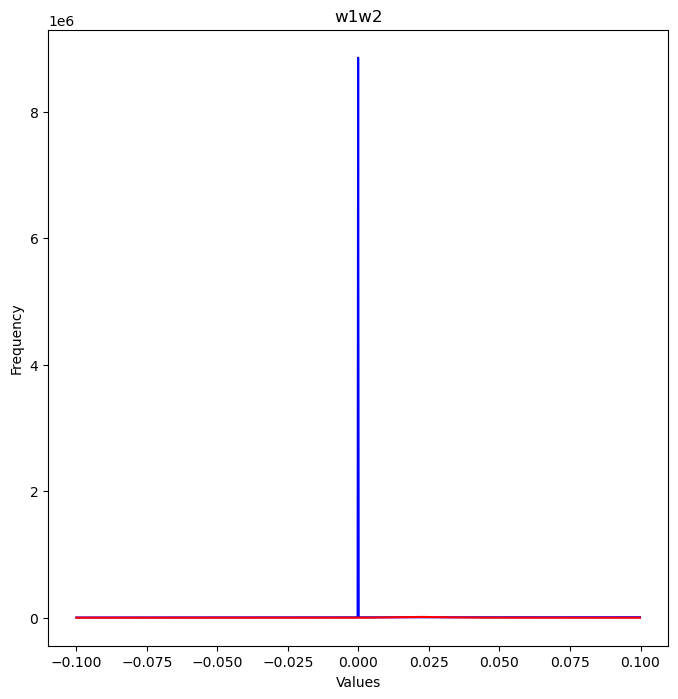

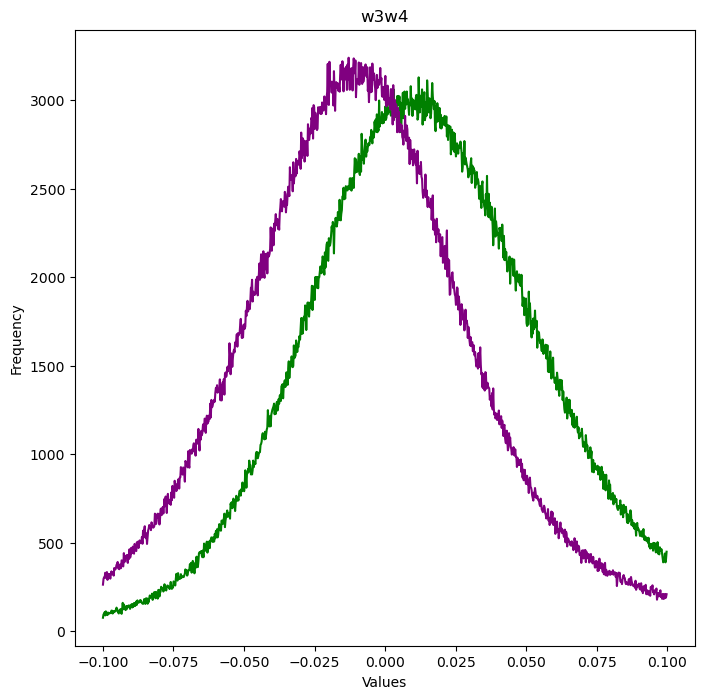

In [5]:
# vars to edit
saveFigs = True
saveStats = True # save histograms stats like mean, median, mode
saveDir = dir # this will save figures to the root directory of galaxies folder in folder called 'figs' - change this if you want it saved elsewhere
color_w1 = 'blue'
color_w2 = 'red'
color_w3 = 'green'
color_w4 =  'purple'
minclip = -.1
maxclip = .1
bincount = 1000
figx = 8
figy = 8
xlabel = 'Values'
ylabel = 'Frequency'

# You should not have to change anything past this point to get the script working correctly

# make directory to store figs if it doesn't exist
if (saveFigs or saveStats):
    if (not os.path.isdir(dir + '/figs/')):
        os.mkdir(dir + '/figs/')

# open/create text file to store histogram statistics
if (saveStats == True):
    if (not os.path.isfile(dir + '/figs/stats.txt')):
        statsFile = open(dir + '/figs/stats.txt', 'x')
    else:
        statsFile = open(dir + '/figs/stats.txt', 'a')
        
# function to save figs
def saveFig(wise):
    plt.savefig(dir + '/figs/' + wise + '.png')   
       
# function to calculate mean, median, mode and print to file
def calcMMM(wdata, wise):
    mean = pystats.mean(wdata)
    meanString = "\nMean of " + wise + ": " + str(mean)
    print(meanString)
    median = pystats.median(wdata)
    medianString = "\nMedian of " + wise + ": " + str(median)
    print(medianString)
    mode = pystats.mode(wdata)
    modeString = "\nMode of " + wise + ": " + str(mode)
    print(modeString)
    if (saveStats == True):
        statsFile.write(meanString)
        statsFile.write(medianString)
        statsFile.write(modeString)
        statsFile.write('\n')

def createFig1(data, figx, figy, xlabel, ylabel, bins, color, wise):
    f = plt.figure(figsize=(figx, figy))
    Y, BE = np.histogram(data, bins=bins)
    X = BE[:-1]
    plt.plot(X, Y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(wise)
    if (saveFigs == True):
        saveFig(wise)
    return X, Y

def createFig2(X_data1, Y_data1, X_data2, Y_data2, figx, figy, xlabel, ylabel, bins, color1, color2, wise):
    f = plt.figure(figsize=(figx, figy))
    #Y_1, BE_1 = np.histogram(data1, bins=bins)
    #Y_2, BE_2 = np.histogram(data2, bins=bins)
    #X_1 = BE_1[:-1]
    #X_2 = BE_2[:-1]
    plt.plot(X_data1, Y_data1, color=color1)
    plt.plot(X_data2, Y_data2, color=color2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(wise)
    if (saveFigs == True):
        saveFig(wise)

# all figures use same bin count, setting it here to be constant
bins=np.linspace(minclip, maxclip, bincount)

# making histograms, figures
# w1
X_w1, Y_w1 = createFig1(w1, figx, figy, xlabel, ylabel, bins, color_w1, "w1")
# Calculate mean, median, mode, and save the figure
calcMMM(w1, 'w1')

# w2
X_w2, Y_w2 = createFig1(w2, figx, figy, xlabel, ylabel, bins, color_w2, "w2")
calcMMM(w2, 'w2')

# w3
X_w3, Y_w3 = createFig1(w3, figx, figy, xlabel, ylabel, bins, color_w3, "w3")
calcMMM(w3, 'w3')

# w4
X_w4, Y_w4 = createFig1(w4, figx, figy, xlabel, ylabel, bins, color_w4, "w4")
calcMMM(w4, 'w4')

# Plotting W1 against W2
createFig2(X_w1, Y_w1, X_w2, Y_w2, figx, figy, xlabel, ylabel, bins, color_w1, color_w2, "w1w2")

# Plotting W3 against W4
createFig2(X_w3, Y_w3, X_w4, Y_w4, figx, figy, xlabel, ylabel, bins, color_w3, color_w4, "w3w4")

if (saveStats == True):
    statsFile.close()

ValueError: x and y must be the same size

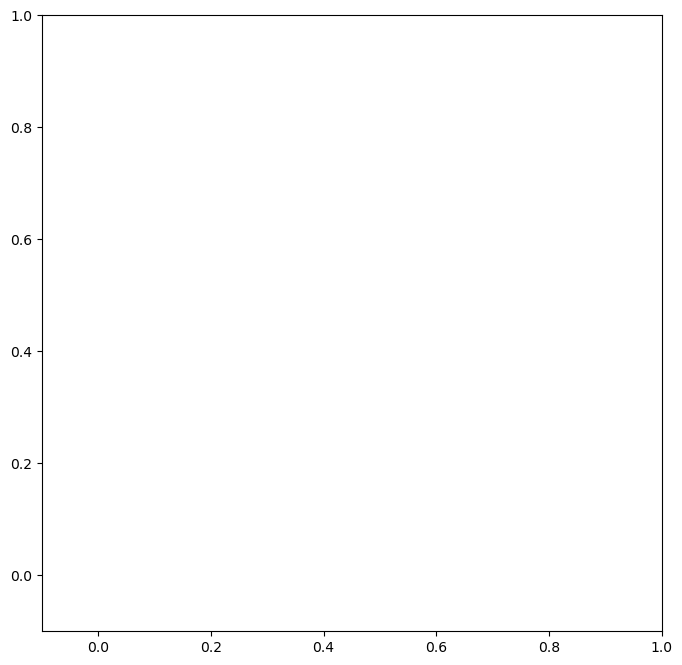

In [7]:
# Plotting w1 against w2
fw12comp = plt.figure(figsize=(figx, figy))
plt.xlim(minclip)
plt.ylim(minclip)
plt.scatter(w1, w2, alpha = 0.5, marker='.')
plt.title('W1-W2 Scatter')
saveFig('w1w2comp')

# Plotting w3 against w4
fw34comp = plt.figure(figsize=(figx, figy))
plt.xlim(minclip)
plt.ylim(minclip)
plt.scatter(w3, w4, alpha = 0.5, marker='.')
plt.title('W3-W4 Scatter')
saveFig('w3w4comp.png')

In [ ]:
hdu = fits.PrimaryHDU()
hdu.header
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

hdul = fits.open(fits_image_filename)  # open a FITS file

hdr = hdul[0].header  # the primary HDU header

print(hdr[34])  # get the 2nd keyword's value

hdr[34] = 20  # change its value

hdr['DARKCORR']  # get the value of the keyword 'darkcorr'

hdr['DARKCOR*']  # get keyword values using wildcard matching

hdr['darkcorr'] = 'PERFORM'  # change darkcorr's value
hdr.set('target', 'NGC1234', 'target name')

# place the next new keyword before the 'TARGET' keyword

hdr.set('newkey', 666, before='TARGET')  # comment is optional

# place the next new keyword after the 21st keyword

hdr.set('newkey2', 42.0, 'another new key', after=20)